In [1]:
import time, matplotlib, sklearn

# visualizatoin 
import matplotlib.pyplot as plt 

# data wrangling
import pandas as pd
import numpy as np 

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

# learning
from sklearn.linear_model import LogisticRegression

# the data intro has been tested with the following versions
print("pandas        Tested version: 2.0.3   Your version: %s" % pd.__version__)
print("numpy         Tested version: 1.21.5  Your version: %s" % np.__version__)
print("matplotlib    Tested version: 3.5.3   Your version: %s" % matplotlib.__version__)
print("scikit-learn  Tested version: 1.2.2   Your version: %s" % sklearn.__version__)

pandas        Tested version: 2.0.3   Your version: 2.2.3
numpy         Tested version: 1.21.5  Your version: 1.26.3
matplotlib    Tested version: 3.5.3   Your version: 3.6.2
scikit-learn  Tested version: 1.2.2   Your version: 1.6.1


# Load data
If you put the data set in the same folder as this notebook, you can use the following code to load the data set. 

In [2]:
# description
description = pd.read_csv('C:\\University\\Year4\\Q3\\Responsible Data Science\\Assignment\\data\\WiDS_Datathon_2020_Dictionary.csv')
description_dict = description.set_index('Variable Name').to_dict(orient='index')
# data
df = pd.read_csv('C:\\University\\Year4\\Q3\\Responsible Data Science\\Assignment\\data\\training_v2.csv')

df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


The dataset contains many different variables, including:

#### Target variable
* *hospital_death*: 'Whether the patient died during this hospitalization.

#### Identifiers
* *patient_id*: Unique identifier associated with a patient
* *encounter_id*: Unique identifier associated with a patient unit stay
* *hospital_id*: Unique identifier associated with a hospital
* *icu_id*: A unique identifier for the unit to which the patient was admitted

#### Demographics
* *age*: The age of the patient on unit admission.
* *bmi*: The body mass index of the person on unit admission.
* *ethnicity*: The common national or cultural tradition which the person belongs to.
* *gender*: The genotypical sex of the patient.
* *height*: The height of the person on unit admission

#### Health indicators
A few examples:
* *elective_surgery*: Whether the patient was admitted to the hospital for an elective surgical operation
* *h1_diasbp_invasive_max*: The patient's highest diastolic blood pressure during the first hour of their unit stay, invasively measured
* *h1_diasbp_invasive_min*: The patient's lowest diastolic blood pressure during the first hour of their unit stay, invasively measured
* *gcs_verbal_apache*: The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score
* *immunosuppression*: Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).

In [3]:
# you can retrieve the description of a variable in the data set from the description dictionary as follows
"""temp_apache
urineoutput_apache
ventilated_apache
wbc_apache
apache_4a_hospital_death_prob
apache_4a_icu_death_prob
apache_3j_bodysystem
apache_2_bodysystem"""

description_dict['icu_admit_source']

{'Category': 'demographic',
 'Unit of Measure': nan,
 'Data Type': 'string',
 'Description': 'The location of the patient prior to being admitted to the unit',
 'Example': 'Operating room'}

# Data analysis (kasra)

In [5]:
# length of the data
f"data is consist of {len(df)} rows and {len(df.columns)} columns"

'data is consist of 91713 rows and 186 columns'

In [6]:
# checking what % of cells are missing in whole data
missing_values = df.isnull().sum().sum()
total_cells = np.product(df.shape)
missing_percent = (missing_values/total_cells) * 100
f"{missing_values} missing values (cells) in the data, which is {missing_percent:.2f}% of the data"

'5743492 missing values (cells) in the data, which is 33.67% of the data'

In [7]:
# calculate missing count and missing percentage for each column
missing_count = df.isna().sum()
missing_percentage = df.isna().mean() * 100

missing_info = pd.DataFrame({
    'missing_percentage': missing_percentage,
    'missing_count': missing_count,
    
})

missing_info = missing_info.sort_values(by='missing_percentage', ascending=False)
missing_info.head(50)

,missing_percentage,missing_count
h1_bilirubin_min,92.265001,84619
h1_bilirubin_max,92.265001,84619
h1_lactate_max,91.992411,84369
h1_lactate_min,91.992411,84369
h1_albumin_max,91.398166,83824
h1_albumin_min,91.398166,83824
h1_pao2fio2ratio_min,87.441257,80195
h1_pao2fio2ratio_max,87.441257,80195
h1_arterial_ph_max,83.329517,76424
h1_arterial_ph_min,83.329517,76424


In [8]:
# check the data types of the columns
numeric_df = df.select_dtypes(include=[np.number])
f"nr of numeric columns: {numeric_df.shape[1]}"

'nr of numeric columns: 178'

In [9]:
non_numeric_df = df.select_dtypes(exclude=[np.number])
print(f"nr of non-numeric columns: {non_numeric_df.shape[1]}")
print(non_numeric_df.columns)

nr of non-numeric columns: 8
Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')


In [10]:
# seeing what % of deaths were male and what % of deaths female
death_counts = df[df['hospital_death'] == 1]['gender'].value_counts(normalize=True) * 100
print(f"death counts per gender: {death_counts}")

# comparing the death rate for different genders
death_counts_female = len(df[(df['gender'] == 'F') & (df['hospital_death'] == 1)])/len(df[df['gender'] == 'F']) * 100
death_count_male = len(df[(df['gender'] == 'M') & (df['hospital_death'] == 1)])/len(df[df['gender'] == 'M']) * 100
print(f"The percentages of deaths of females and males out of the total number of females and males\nrespectively, {death_counts_female}% compared to {death_count_male}%")

death counts per gender: gender
M    52.813962
F    47.186038
Name: proportion, dtype: float64
The percentages of deaths of females and males out of the total number of females and males
respectively, 8.83725336933608% compared to 8.44165032646708%


Ethnicities in the data are: ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


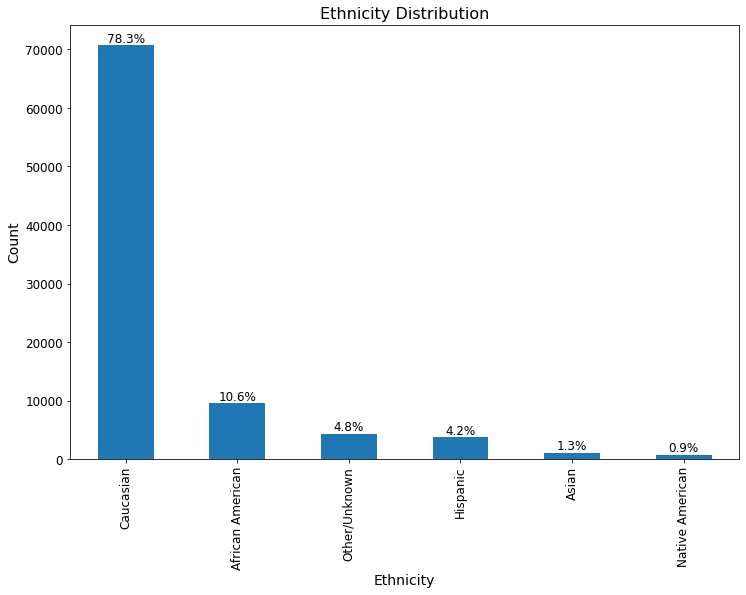

In [11]:
print(f"Ethnicities in the data are: {df['ethnicity'].unique()}")

# plotting eth
eth_counts = df['ethnicity'].value_counts()
eth_percent = eth_counts / eth_counts.sum() * 100

plt.figure(figsize=(12, 8))
ax = eth_counts.plot(kind='bar', fontsize=12)

plt.title("Ethnicity Distribution", fontsize=16)
plt.xlabel("Ethnicity", fontsize=14)
plt.ylabel("Count", fontsize=14)

for i, count in enumerate(eth_counts):
    plt.text(i, count, f'{eth_percent.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=12)

plt.show()

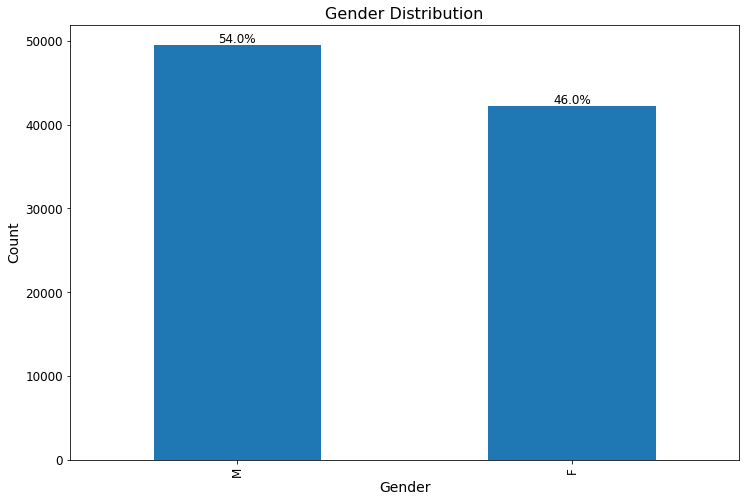

In [12]:
# plotting gender distribution

gen_counts = df['gender'].value_counts()
gen_percent = gen_counts / gen_counts.sum() * 100

plt.figure(figsize=(12, 8))
ax = gen_counts.plot(kind='bar', fontsize=12)

plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)

for i, count in enumerate(gen_counts):
    plt.text(i, count, f'{gen_percent.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=12)

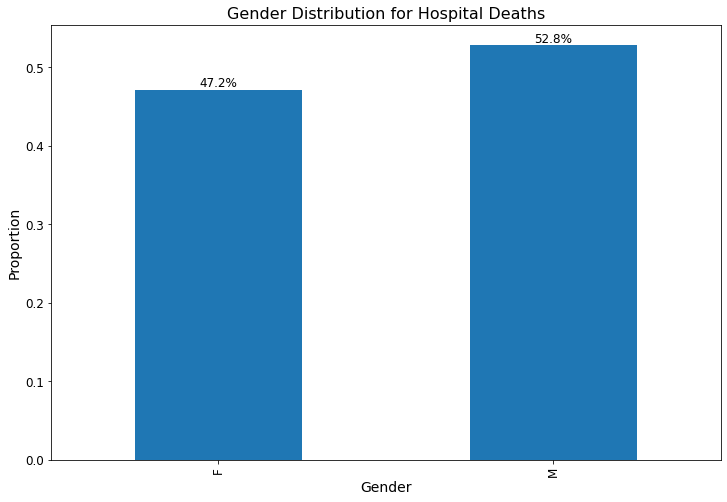

In [13]:
gen_death = df.groupby('hospital_death')['gender'].value_counts(normalize=True).unstack()
gen_death_1 = gen_death.loc[1]

plt.figure(figsize=(12, 8))
ax = gen_death_1.plot(kind='bar', fontsize=12)

plt.title("Gender Distribution for Hospital Deaths", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Proportion", fontsize=14)

for i, proportion in enumerate(gen_death_1):
    plt.text(i, proportion, f'{proportion:.1%}', ha='center', va='bottom', fontsize=12)

plt.show()

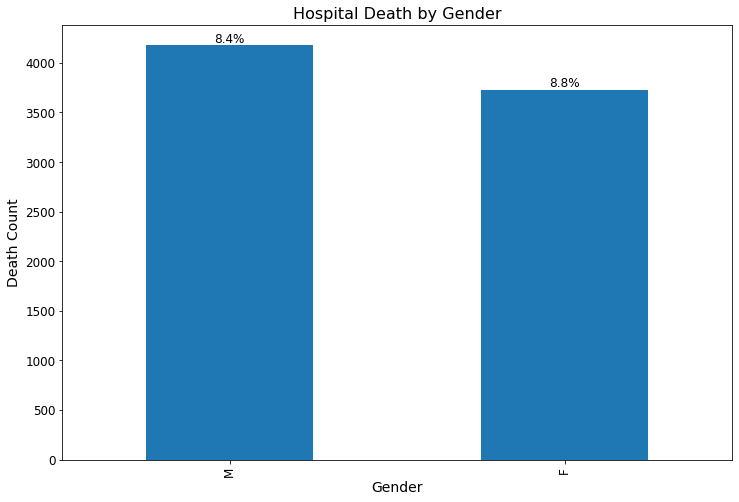

In [14]:
# compute death counts per gender
dead_counts = df[df['hospital_death'] == 1]['gender'].value_counts()
total_counts = df['gender'].value_counts()
death_percent = dead_counts / total_counts * 100

plt.figure(figsize=(12, 8))
ax = dead_counts.plot(kind='bar', fontsize=12)

plt.title("Hospital Death by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Death Count", fontsize=14)

for i, count in enumerate(dead_counts):
    plt.text(i, count, f'{death_percent.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=12)

plt.show()

In [15]:
# Select only numeric columns from df
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlations with the target variable 'hospital_death'
correlations = numeric_df.corr()['hospital_death'].drop('hospital_death').abs().sort_values(ascending=False)

ranking_df = pd.DataFrame({
    'feature': correlations.index,
    'importance': correlations.values
})

print("Absolute Pearson Correlation of each feature with hospital_death:")
ranking_df.index = np.arange(1, len(ranking_df) + 1)
ranking_df.head(30)

Absolute Pearson Correlation of each feature with hospital_death:


,feature,importance
1,d1_lactate_min,0.403614
2,d1_lactate_max,0.399029
3,h1_lactate_min,0.344046
4,h1_lactate_max,0.340951
5,apache_4a_hospital_death_prob,0.311043
6,apache_4a_icu_death_prob,0.283913
7,gcs_motor_apache,0.282449
8,gcs_eyes_apache,0.260373
9,gcs_verbal_apache,0.241044
10,d1_sysbp_invasive_min,0.234382


<Figure size 1800x4320 with 0 Axes>

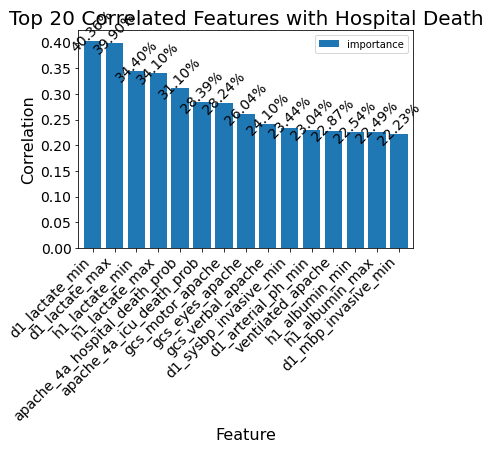

In [16]:
# plot the top 20 correlated features with hospital_death
plt.figure(figsize=(25, 60))
ax = ranking_df.head(15).set_index('feature').plot(kind='bar', fontsize=14, width=0.8)

plt.title("Top 20 Correlated Features with Hospital Death", fontsize=20)
plt.xlabel("Feature", fontsize=16)
plt.ylabel("Correlation", fontsize=16)

# Add percentages on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14, rotation=45)

# Tilt the labels for bars
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)

plt.show()

In [17]:
for i in df.columns:
    if 'apache' in i:
        print(i)

albumin_apache
apache_2_diagnosis
apache_3j_diagnosis
apache_post_operative
arf_apache
bilirubin_apache
bun_apache
creatinine_apache
fio2_apache
gcs_eyes_apache
gcs_motor_apache
gcs_unable_apache
gcs_verbal_apache
glucose_apache
heart_rate_apache
hematocrit_apache
intubated_apache
map_apache
paco2_apache
paco2_for_ph_apache
pao2_apache
ph_apache
resprate_apache
sodium_apache
temp_apache
urineoutput_apache
ventilated_apache
wbc_apache
apache_4a_hospital_death_prob
apache_4a_icu_death_prob
apache_3j_bodysystem
apache_2_bodysystem


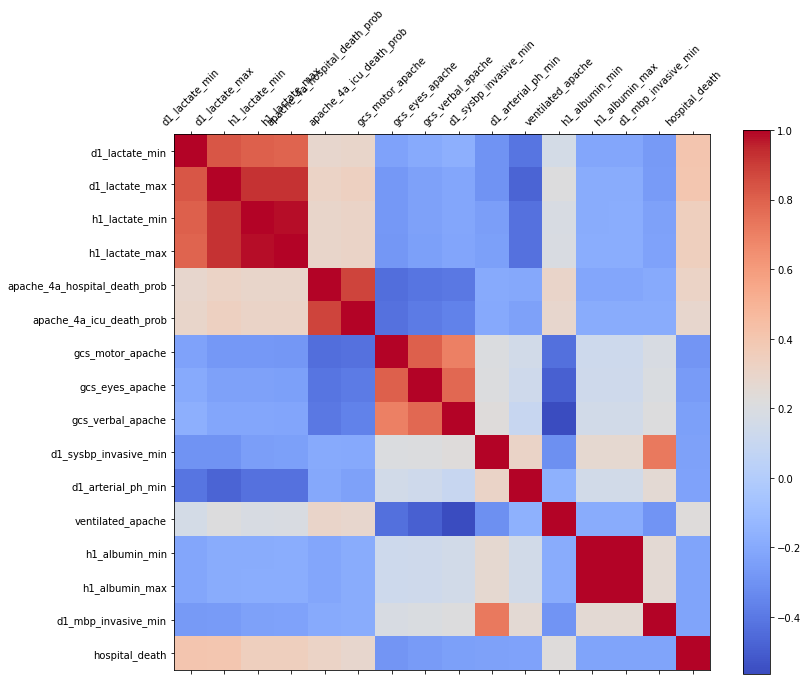

In [18]:
# correlation matrix for the top 15 correlated features with hospital_death
top_features = ranking_df.head(15)['feature'].values
top_features = np.append(top_features, 'hospital_death')

top_corr = df[top_features].corr()

plt.figure(figsize=(12, 10))
ax = plt.gca()

cax = ax.matshow(top_corr, cmap='coolwarm')
plt.colorbar(cax)

plt.xticks(range(len(top_corr.columns)), top_corr.columns, rotation=45)
plt.yticks(range(len(top_corr.columns)), top_corr.columns)

plt.show()

In [19]:
# we could possibly have categories for some columns to see how each category in that column is related to the target variable
# e.g. dividing weight into underweight, normal, overweight, obese and see how it relates to hospital_death 
# (however leaving it as numerical) still gives us the correlation with the target variable but it might be
#  nicer for the report and explanation

In [20]:
# drop columns with missing value higher than threshold )
nr_columns = len(df.columns)
threshold = 0.8
df = df.dropna(thresh=threshold*len(df), axis=1)

print(f"dropped {nr_columns - len(df.columns)} columns with missing values higher than {threshold*100}%")
print(f"we could play with threshold but it doesnt have much effect since lot of columns barely have any values in them (explain kasra)")

missing_values_after_dropping = df.isnull().sum().sum()
total_cells = np.product(df.shape)
missing_percent = (missing_values_after_dropping/total_cells) * 100
f"{missing_values} missing values (cells) in the data, which is {missing_percent:.2f}% of the data"

dropped 82 columns with missing values higher than 80.0%
we could play with threshold but it doesnt have much effect since lot of columns barely have any values in them (explain kasra)


'5743492 missing values (cells) in the data, which is 4.47% of the data'

In [21]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

print(f"numeric columns: {len(numeric_columns)}")
print(f"categorical columns: {len(categorical_columns)}")

numeric columns: 97
categorical columns: 7


In [22]:
# checking if there are any columns with only one unique value and printing those columns
unique_values = df.nunique()
unique_values = unique_values[unique_values == 1]

print(f"there are {len(unique_values)} columns with only one unique value")
print(unique_values)

there are 1 columns with only one unique value
readmission_status    1
dtype: int64


In [23]:
# Finding columns with low variance in numerical columns
variance_threshold = 0.01
low_variance = df[numeric_columns].var() < variance_threshold

print(f"there are {low_variance.sum()} columns with low variance in numerical columns")
print(df[numeric_columns].columns[low_variance])
print(df[numeric_columns].var()[low_variance])

there are 5 columns with low variance in numerical columns
Index(['readmission_status', 'gcs_unable_apache', 'aids', 'leukemia',
       'lymphoma'],
      dtype='object')
readmission_status    0.000000
gcs_unable_apache     0.009438
aids                  0.000856
leukemia              0.007016
lymphoma              0.004115
dtype: float64


In [24]:
# Finding the binary columns according to its description 
binary_columns = []
for col in df.columns:
    if description_dict[col]['Data Type'] == 'binary':
        binary_columns.append(col)

# excluding the target variable
binary_columns.remove('hospital_death')

print(f"there are {len(binary_columns)} binary columns")
print(binary_columns)

there are 15 binary columns
['elective_surgery', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


In [25]:
# filling in missing values for numerical columns with mean of the column, excluding binary columns
numeric_columns_excluding_binary = numeric_columns.difference(binary_columns)
df[numeric_columns_excluding_binary] = df[numeric_columns_excluding_binary].fillna(df[numeric_columns_excluding_binary].mean())

# filling in missing values for categorical columns with the most frequent value in the column
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.value_counts().idxmax()))

# check if there are any missing values left
missing_values = df.isnull().sum().sum()
f"there are {missing_values} missing values left in the data"


'there are 8902 missing values left in the data'

In [26]:
# Dropping final rows that have missing values (due to not interpolating binary values)
df = df.dropna()

# check if there are any missing values left
missing_values = df.isnull().sum().sum()
f"there are {missing_values} missing values left in the data"

'there are 0 missing values left in the data'

0 elective_surgery
1 readmission_status
2 apache_post_operative
3 arf_apache
4 gcs_unable_apache
5 intubated_apache
6 ventilated_apache
7 aids
8 cirrhosis
9 diabetes_mellitus
10 hepatic_failure
11 immunosuppression
12 leukemia
13 lymphoma
14 solid_tumor_with_metastasis


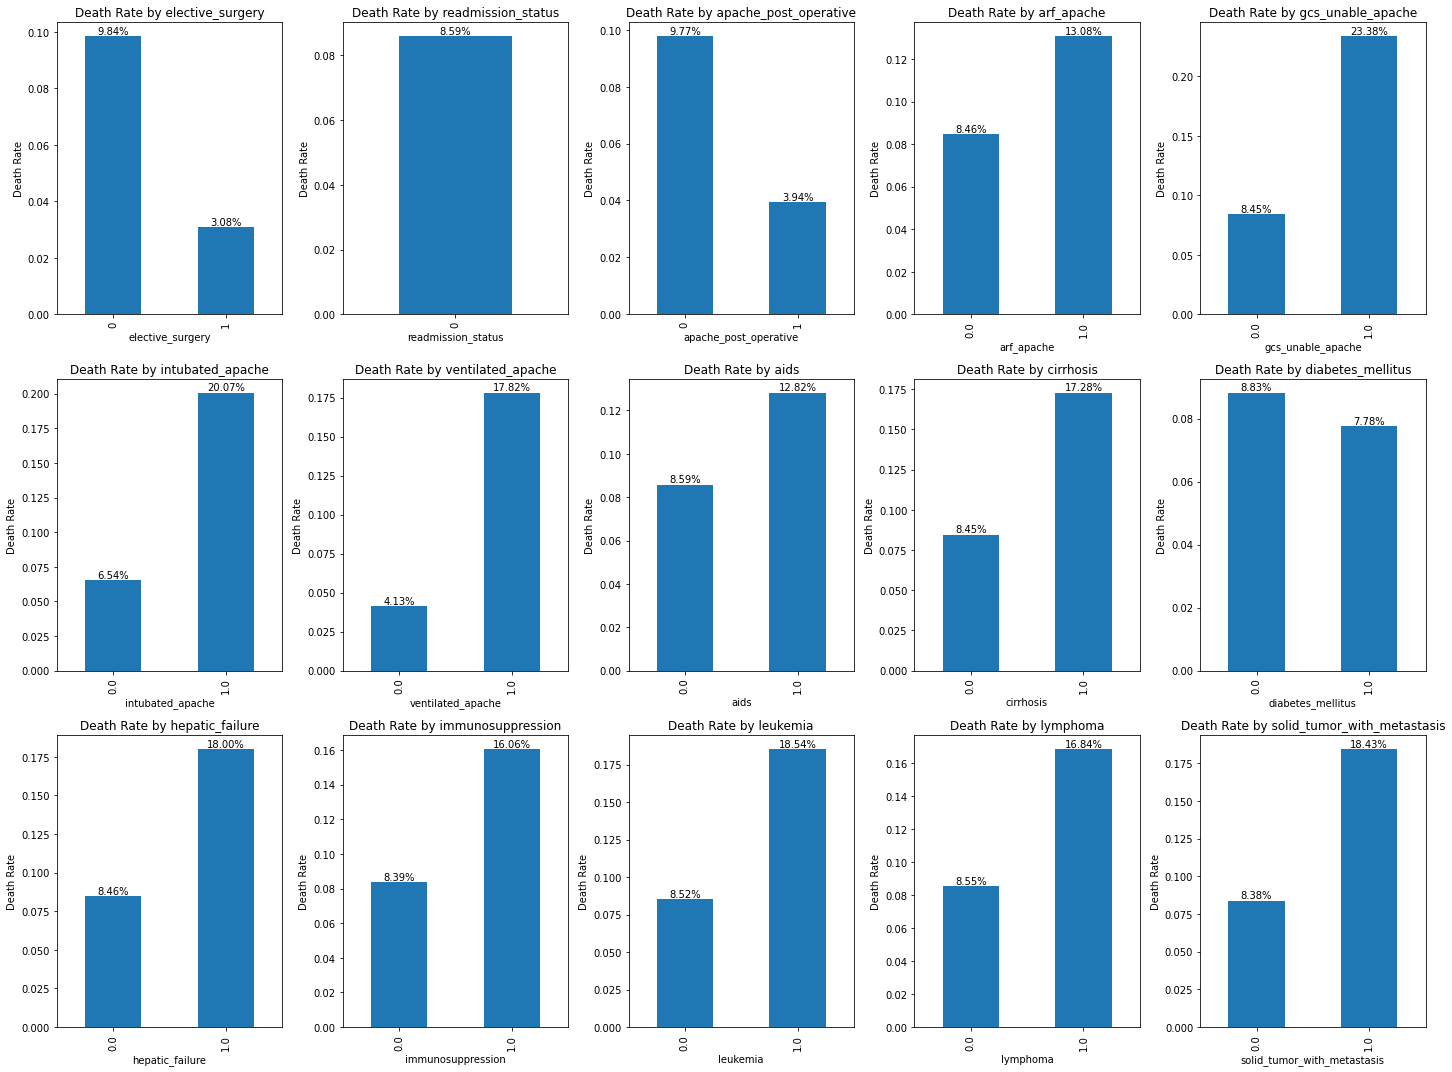

In [27]:
# plotting death rate for binary columns in sub plots of 3 * 5
fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(binary_columns):
    print(i, col)
    death_rate = df.groupby(col)['hospital_death'].mean()
    death_rate.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Death Rate by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Death Rate")
    
    for j, rate in enumerate(death_rate):
        axes[i].text(j, rate, f'{rate:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [28]:
# Final row count after preprocessing
f"final row count after preprocessing: {len(df)}"

'final row count after preprocessing: 90676'

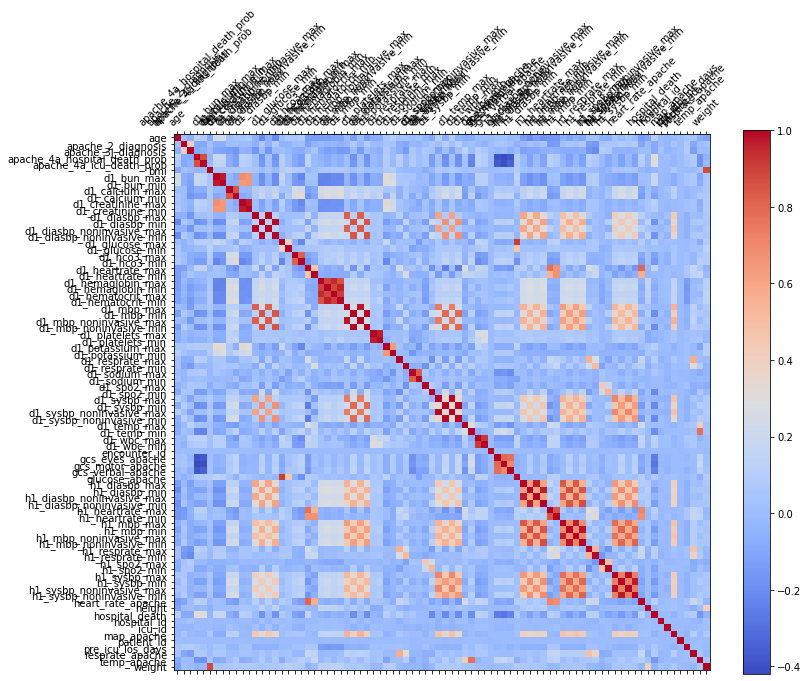

In [29]:
# plotting correlation matrix for numerical columns
plt.figure(figsize=(12, 10))
ax = plt.gca()

cax = ax.matshow(df[numeric_columns_excluding_binary].corr(), cmap='coolwarm')
plt.colorbar(cax)

plt.xticks(range(len(df[numeric_columns_excluding_binary].columns)), df[numeric_columns_excluding_binary].columns, rotation=45)
plt.yticks(range(len(df[numeric_columns_excluding_binary].columns)), df[numeric_columns_excluding_binary].columns)

plt.show()

In [30]:
# printing the columns with higher correlation than threshold
cor_threshold = 0.5
correlation_matrix = df[numeric_columns_excluding_binary].corr().abs()
correlation_matrix = correlation_matrix[correlation_matrix > cor_threshold]
correlation_matrix = correlation_matrix[correlation_matrix < 1]

correlated_columns = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
correlated_columns = correlated_columns[correlated_columns > cor_threshold]

print(f"there are {len(correlated_columns)} pairs of columns with correlation higher than {cor_threshold}")
for i, cor in correlated_columns.items():
    print(i, cor)

there are 185 pairs of columns with correlation higher than 0.5
('d1_diasbp_noninvasive_min', 'd1_diasbp_min') 0.9930204251622596
('d1_sysbp_noninvasive_max', 'd1_sysbp_max') 0.9924790115035333
('d1_sysbp_min', 'd1_sysbp_noninvasive_min') 0.9924126780676237
('d1_diasbp_noninvasive_max', 'd1_diasbp_max') 0.992339121145702
('d1_mbp_min', 'd1_mbp_noninvasive_min') 0.9904532378141179
('h1_sysbp_max', 'h1_sysbp_noninvasive_max') 0.9798008422782374
('h1_mbp_noninvasive_min', 'h1_mbp_min') 0.9764411687631392
('d1_mbp_noninvasive_max', 'd1_mbp_max') 0.975320121936748
('h1_sysbp_min', 'h1_sysbp_noninvasive_min') 0.9712336398066956
('d1_creatinine_max', 'd1_creatinine_min') 0.970035753483593
('d1_bun_min', 'd1_bun_max') 0.9674172844488381
('h1_diasbp_max', 'h1_diasbp_noninvasive_max') 0.9661751670003396
('h1_mbp_noninvasive_max', 'h1_mbp_max') 0.9642448106673813
('d1_platelets_min', 'd1_platelets_max') 0.9634800201452176
('h1_diasbp_noninvasive_min', 'h1_diasbp_min') 0.9628868659555564
('d1_hema

In [ ]:
dropping = ["encounter_id", "patient_id", "hospital_id", "height", "icu_id", "icu_stay_type", "readmission_status", "weight", "apache_2_diagnosis", "apache_3j_diagnosis", "apache_post_operative", "arf_apache", "map_apache",
             "resprate_apache", "temp_apache", "d1_diasbp_max", "d1_diasbp_min", "d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min", "d1_mbp_noninvasive_max", "d1_resprate_min", "d1_spo2_max", "d1_sysbp_max", "d1_sysbp_noninvasive_max", 
             "d1_temp_max", "h1_diasbp_max", "h1_diasbp_noninvasive_max", "h1_heartrate_min", "h1_mbp_max", "h1_mbp_noninvasive_max", "h1_spo2_max", "h1_sysbp_max", "h1_sysbp_noninvasive_max", "d1_calcium_max", "d1_glucose_max", "d1_glucose_min", 
             "d1_hemaglobin_max", "d1_hemaglobin_min", "d1_hematocrit_max", "d1_hematocrit_min", "d1_platelets_max", "d1_platelets_min", "d1_potassium_min", "d1_sodium_max", "d1_sodium_min", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob", 
             "apache_3j_bodysystem", "apache_2_bodysystem", "icu_type", "bmi", "ethnicity", "height", ]


keeping = ["hospital_death", "age", "elective_surgery", "gender", "pre_icu_los_days", "gcs_eyes_apache", "gcs_motor_apache", "gcs_unable_apache", "gcs_verbal_apache", "heart_rate_apache", "intubated_apache", "ventilated_apache",
            "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_min", "d1_mbp_noninvasive_min", "d1_resprate_max", "d1_spo2_min", "d1_sysbp_min", "d1_sysbp_noninvasive_min", "d1_temp_min", "h1_diasbp_min", "h1_diasbp_noninvasive_min", "h1_heartrate_max",
              "h1_mbp_min", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_resprate_min", "h1_spo2_min", "h1_sysbp_min", "h1_sysbp_noninvasive_min", "d1_bun_max", "d1_bun_min", "d1_calcium_min", "d1_creatinine_max", "d1_creatinine_min", "d1_hco3_max", "d1_hco3_min",
                "d1_potassium_max", "d1_wbc_max", "d1_wbc_min", "aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis", "icu_admit_source"]



In [32]:
len(keeping) + len(dropping)

104

In [33]:
# going through columns one by one reading their descriptoin and deciding if they should be in final training or not

i = 1
for col in df.columns:
    print(f"{i}. col: {col}", f"Data Type: {description_dict[col]['Data Type']}", f"Description: {description_dict[col]['Description']}", sep='\n')
    if col in numeric_columns:
        print(f"Variance: {df[col].var()}")
        # we check correlation with target variable for numerical columns
        print(f"Correlation with target variable: {df[col].corr(df['hospital_death'])}")
        print(f"nr of unique values: {df[col].nunique()}")
    i += 1    
    print()

1. col: encounter_id
Data Type: integer
Description: Unique identifier associated with a patient unit stay
Variance: 1429162658.9952283
Correlation with target variable: -0.005697923012069047
nr of unique values: 90676

2. col: patient_id
Data Type: integer
Description: Unique identifier associated with a patient
Variance: 1429685130.7180097
Correlation with target variable: 0.004682566523592403
nr of unique values: 90676

3. col: hospital_id
Data Type: integer
Description: Unique identifier associated with a hospital
Variance: 3951.529029324367
Correlation with target variable: -0.001331163143379432
nr of unique values: 147

4. col: hospital_death
Data Type: binary
Description: Whether the patient died during this hospitalization
Variance: 0.0785122973583839
Correlation with target variable: 1.0
nr of unique values: 2

5. col: age
Data Type: numeric
Description: The age of the patient on unit admission
Variance: 270.5610225326139
Correlation with target variable: 0.10669871047680361
n

c:\Users\20211576\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20211576\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Variance: 0.1284383449652917
Correlation with target variable: 0.1730114922643388
nr of unique values: 2

29. col: map_apache
Data Type: numeric
Description: The mean arterial pressure measured during the first 24 hours which results in the highest APACHE III score
Variance: 1764.1038073463285
Correlation with target variable: -0.04040296330239958
nr of unique values: 162

30. col: resprate_apache
Data Type: numeric
Description: The respiratory rate measured during the first 24 hours which results in the highest APACHE III score
Variance: 227.1758701422727
Correlation with target variable: 0.0867438315655241
nr of unique values: 75

31. col: temp_apache
Data Type: numeric
Description: The temperature measured during the first 24 hours which results in the highest APACHE III score
Variance: 0.6694723332686943
Correlation with target variable: -0.1542555150018172
nr of unique values: 192

32. col: ventilated_apache
Data Type: binary
Description: Whether the patient was invasively ventila

In [35]:
df = df[keeping]
df.head()

,hospital_death,age,elective_surgery,gender,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,...,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,icu_admit_source
0,0,68.0,0,M,0.541667,3.0,6.0,0.0,4.0,118.0,...,14.100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Floor
1,0,77.0,0,F,0.927778,1.0,3.0,0.0,1.0,120.0,...,12.700000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Floor
2,0,25.0,0,F,0.000694,3.0,6.0,0.0,5.0,102.0,...,11.313536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accident & Emergency
3,0,81.0,1,F,0.000694,4.0,6.0,0.0,5.0,114.0,...,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Operating Room / Recovery
5,0,67.0,0,M,0.000694,4.0,6.0,0.0,5.0,113.0,...,10.900000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Accident & Emergency


In [36]:
# one hot encoding for icu_admit_source
df = pd.get_dummies(df, columns=['icu_admit_source'], drop_first=True)

# turning F and M into 0 and 1
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

df.head()

,hospital_death,age,elective_surgery,gender,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU
0,0,68.0,0,1,0.541667,3.0,6.0,0.0,4.0,118.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
1,0,77.0,0,0,0.927778,1.0,3.0,0.0,1.0,120.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
2,0,25.0,0,0,0.000694,3.0,6.0,0.0,5.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
3,0,81.0,1,0,0.000694,4.0,6.0,0.0,5.0,114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False
5,0,67.0,0,1,0.000694,4.0,6.0,0.0,5.0,113.0,...,1.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False


# Pre-processing
This is a real-world data set, meaning that it is **messy**. Two key difficulties are categorial features and missing values.

> **To avoid information leakage, any pre-processing steps must be based on the training data only.** For example, when we compute the mean, this must be computed based on the training data set.

### Categorical Features
Many (implementations of) machine learning algorithms cannot handle categorical features automatically. This is often dealt with through *one-hot-encoding*, where each category of a feature is transformed into a binary feature.

When a feature contains many categories, this results in a very sparse data set with many features. As such, it can be worthwile to use domain expertise to merge particular categories in order to reduce the number of one-hot-encoded features.

### Missing Values
The data set contains a lot of missing values (around 35% of the values is missing). There are several ways to deal with this, some ideas to try:

* Replace missing values with the mean (numerical features) or median (categorical features), e.g., using [`SimpleImputer`](https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation).
* Drop features with many missing values.
* Model-based imputation strategies, such as [KNNImputer](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation).
* Domain-knowledge inspired replacement. For example, for features related to medical measurements, it is expected that the entered data is abnormal in some way. As such, replacing by the mean or median can paint a skewed picture. One way to deal with this would be to identify a normal range for different measurements, based on domain expertise. *Note: this is a very time consuming strategy which we do not necessarily recommend in the time span of this project.*

We encourage you to try several approaches and see what works best.

## Example of  Minimal Pre-Processing
Below you can find an example of pre-processing the data set for classification. We showcase both 'manual' pre-processing steps through `pandas` as well as a (small) scikit-learn `Pipeline`. Feel free to use whatever you are most comfortable with in your project.

In [ ]:
# lets see the all the column names and their descriptions
for i, col in enumerate(df.columns, start=1):
    print(f"{i}. {col}: {description_dict[col]['Description']}")

In [ ]:
# calculate missing values and their percentage
missing_values = df.isnull().sum()
missing_values_percentage = df.isnull().mean() * 100

# print the result using a for loop
print("Missing Values and their Percentage")
for col, missing, percentage in zip(df.columns, missing_values, missing_values_percentage):
    # print(f"{col}:, Missing Values: {missing}, Percentage: {percentage:.2f}%")
    print(f"{col}: {percentage:.2f}%")


In [ ]:
# printing the columns in descending order of missing values
print("Columns in descending order of missing values")
missing_values_percentage.sort_values(ascending=False).head(50)

In [ ]:
# nr of columns that have missing values % higher than X
X_miss = 25
nr_cols = (missing_values_percentage > X_miss).sum()
print(f"Nr of columns that have missing values % higher than {X_miss}: {nr_cols}")

In [ ]:
# printing the columns names that have missing values % higher than X and their description

print(f"Columns that have missing values % higher than {X_miss}")
for col, percentage in missing_values_percentage.items():
    if percentage > X_miss:
        print(f"{col}: {description_dict[col]['Description']}")

In [ ]:
# checking if h1_arterial_pco2_min and h1_arterial_pco2_max are missing in the same rows and how many individually are missing
missing_h1_arterial_pco2_min = df['h1_arterial_pco2_min'].isnull()
missing_h1_arterial_pco2_max = df['h1_arterial_pco2_max'].isnull()

missing_h1_arterial_pco2_min_and_max = (missing_h1_arterial_pco2_min & missing_h1_arterial_pco2_max).sum()
missing_h1_arterial_pco2_min_only = missing_h1_arterial_pco2_min.sum() - missing_h1_arterial_pco2_min_and_max
missing_h1_arterial_pco2_max_only = missing_h1_arterial_pco2_max.sum() - missing_h1_arterial_pco2_min_and_max

print(f"Nr of rows that have missing values for h1_arterial_pco2_min and h1_arterial_pco2_max: {missing_h1_arterial_pco2_min_and_max}")
print(f"Nr of rows that have missing values for h1_arterial_pco2_min only: {missing_h1_arterial_pco2_min_only}")
print(f"Nr of rows that have missing values for h1_arterial_pco2_max only: {missing_h1_arterial_pco2_max_only}")

In [ ]:
test_size = 0.2 # proportion for train versus test+val split
val_size = 0.5 # proportion for test versus val split
random_state = 42  # random state is used to set a seed for randomness, which is only relevant for reproducibility purposes
max_missing = 0.2  # maximum percentage of missing values for a column to be dropped

In [ ]:
start_time = time.time()

# save features
X = df.copy().drop(['hospital_death', 'patient_id', 'encounter_id', 'hospital_id', 'icu_id', # drop identifiers
                    'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', # drop APACHE scores
                    'apache_2_bodysystem'], # drop because of similarity with apache_3j_bodysystem
                   axis=1)
# save target variable
y = df['hospital_death'].copy()
# save APACHE scores for later evaluation on train / test / validation data
y_apache = df['apache_4a_hospital_death_prob'].copy()

""" SPLIT DATA SET """
# split the dataset into train and test+validation set
(
    X_train,
    X_test,
    y_train,
    y_test,
    y_apache_train,
    y_apache_test,
    ) = train_test_split(X, y, y_apache, 
                         test_size=test_size, # used for testing and validation
                         random_state=random_state # for reproducibility
                        ) 
# split the test set into test + validation set
(
    X_val,
    X_test,
    y_val,
    y_test,
    y_apache_val,
    y_apache_test,
    ) = train_test_split(X_test, y_test, y_apache_test, 
                         test_size=val_size, # used for testing and validation
                         random_state=random_state # for reproducibility
                        ) 

"""MISSING VALUES"""
# drop columns with many missing values
missing = X_train.isna().sum() > max_missing * len(X_train)
missing = missing[missing].index
X_train = X_train.drop(missing, axis=1)
X_val = X_val.drop(missing, axis=1)
X_test = X_test.drop(missing, axis=1)

"""FURTHER PROCESSING PIPELINE"""
# define pre-processing steps for numerical features
num_transformer = Pipeline(steps=[("constant", VarianceThreshold()), # remove constant features
                                  ("imputer", SimpleImputer(strategy="mean")),
                                 ])
# define preprocessing steps for categorical features
cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder(drop='first', sparse_output=False, handle_unknown="ignore"))])
# create preprocessing pipeline
prep_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_exclude=object)), # apply to columns NOT of type object (int or float)
        ('cat', cat_transformer, make_column_selector(dtype_include=object)) # apply to columns of type object
    ])
# pipeline
prep_pipeline.fit(X_train, y_train)
display(prep_pipeline) # disply preprocessing pipeline

# transform data sets
X_train = pd.DataFrame(prep_pipeline.transform(X_train), columns=prep_pipeline.get_feature_names_out())
X_val = pd.DataFrame(prep_pipeline.transform(X_val), columns=prep_pipeline.get_feature_names_out())
X_test = pd.DataFrame(prep_pipeline.transform(X_test), columns=prep_pipeline.get_feature_names_out())
        
"""PRINT STATS"""
print("Time: %.2fs" % (time.time() - start_time))
print("Train set: %s rows, %s columns" % X_train.shape)
print("Validation set: %s rows, %s columns" % X_val.shape)
print("Test set: %s rows, %s columns" % X_test.shape)

## Simple Logistic Regression Model
We can now train a simple logistic regression model.

> **Warning**. The following code will lead to a convergence warning. To solve this "issue", you can increase `max_iter` and/or apply a `sklearn.preprocessing.StandardScaler()`. However, the model still performance reasonably well even without convergence.

In [ ]:
start_time = time.time()

# train logistic regression model
lr = LogisticRegression(penalty='l2', solver='saga')
lr.fit(X_train, y_train)

print("Time: %.2fs" % (time.time() - start_time))

In [ ]:
# evaluate model, precision, recall, f1-score
from sklearn.metrics import classification_report

y_pred = lr.predict(X_val)
print(classification_report(y_val, y_pred))

# APACHE IV Scores
APACHE ("Acute Physiology and Chronic Health Evaluation") is a scoring system assessing severity of illness and prognoses of ICU patients. The scoring system has been improved over time, with APACHE II being released in 1985, APACHE III in 1991, and finally APACHE IV in 2006. APACHE IV has been evaluated and validated in patients for mortality outcome. 

In the dataset, the *apache_4a_hospital_death_prob* column corresponds to the APACHE IV probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.
* `-1` means the score couldn't be calculated for some reason. In particular, the patient encounter could have been a re-admission. 
* `NaN` indicates a missing score, due to e.g., a missing covariate that made it impossible to compute the score. 


In [ ]:
# histogram
y_apache_train.hist()
plt.title("APACHE scores (train)")
plt.show()